# 4.1. Введение. Функции активации
Введение
В этом модуле мы поговорим о следующем:
- функциях активации;
- инициализации;
- batch-нормализации;
- dropout-регуляции;
- градиентном спуске;
- стохастическом градиентном спуске;
- матричных операциях.

Функции активации  
https://vod-progressive.akamaized.net/exp=1645788296~acl=%2Fvimeo-prod-skyfire-std-us%2F01%2F4345%2F12%2F321728275%2F1249949404.mp4~hmac=7b69adbb855da6231e419749b2262248a48741c227bec435f08ca11ef26a882c/vimeo-prod-skyfire-std-us/01/4345/12/321728275/1249949404.mp4

Функция активации нейрона определяет выходной сигнал, который, в свою очередь, определяется входным сигналом или набором входных сигналов. Функцию активации используют, чтобы получить выходные данные узла.

Функции активации делятся на два типа:
- линейные функции активации;
- нелинейные функции активации.

Сигмоида (Sigmoid) — возрастающая нелинейная функция, имеющая форму буквы «S». В нейронных сетях она используется потому, что позволяет усиливать слабые сигналы.

Проблемы Sigmoid-активации:
- Нейроны с сигмоидой могут насыщаться и приводить к угасающим градиентам.
- Не центрированы в нуле.
- Дорого вычислять.
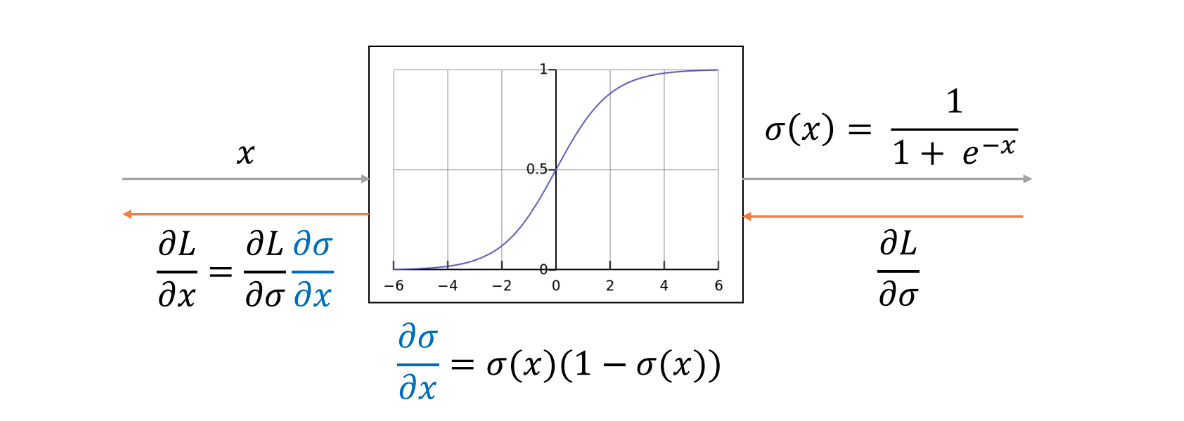
Функция Tanh похожа на сигмоиду, но её преимущество состоит в том, что отрицательные входные данные будут отображаться строго отрицательными, а нулевые входные данные будут отображаться вблизи нуля.

Характеристики Tanh активации:
- центрирована в нуле;
- но все ещё как сигмоида.
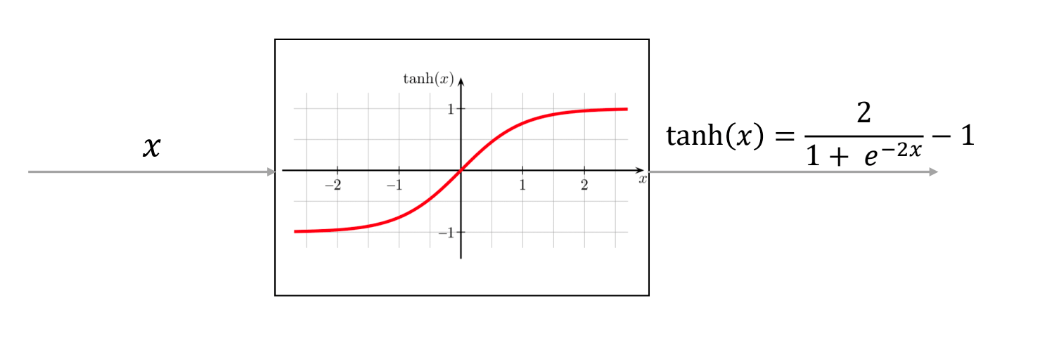
ReLU (rectified linear unit) является наиболее часто используемой функцией активации в мире, так как она используется практически во всех свёрточных нейронных сетях или для Deep Learning.

Характеристики ReLU активации:
- быстро считается;
- градиенты не угасают при х > 0;
- не центрирована в нуле;
- если не было активации, не будет обновления. 
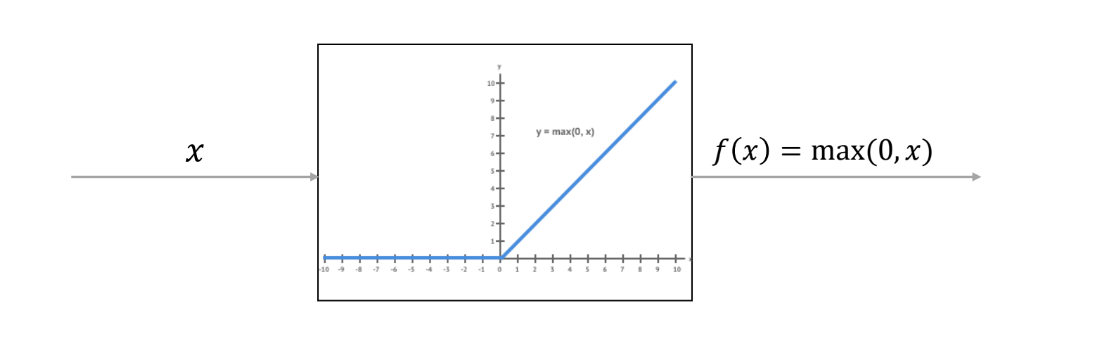
Leaky ReLU является попыткой решить проблему выхода ReLU из строя.

Характеристики Leaky ReLU-активации:
- всегда будут обновления;
- примерно центрирована в нуле;
- а ≠ 1.
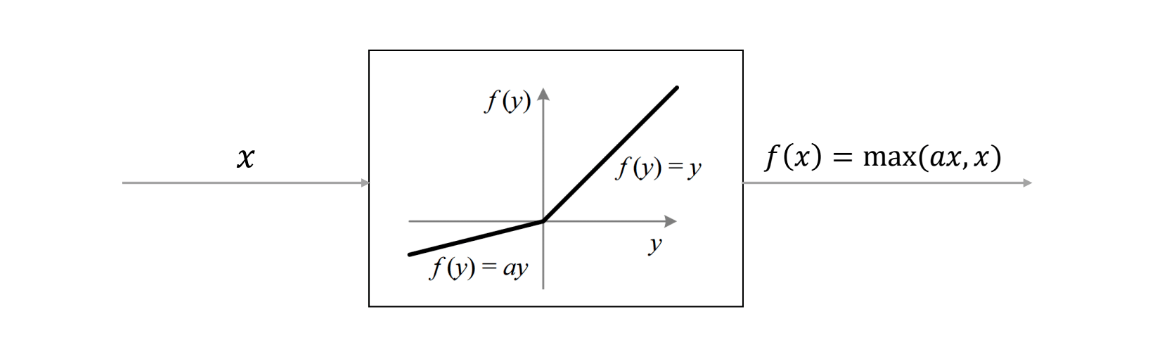
Функция активации ELU (Exponential Linear Unit), по результатам исследований, быстрее сводит к нулю и даёт более точные результаты.

В отрицательной части аргументов использует экспоненту.
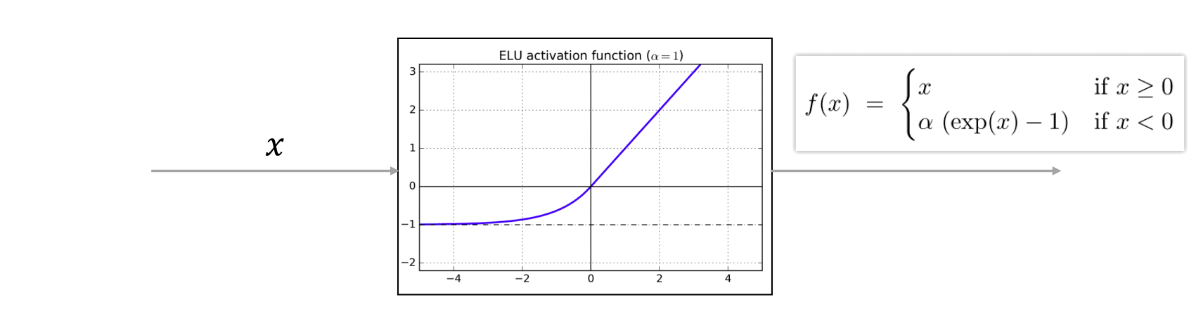
Характеристики ELU:
- примерно центрирована в нуле;
- сходимость быстрее ReLU.
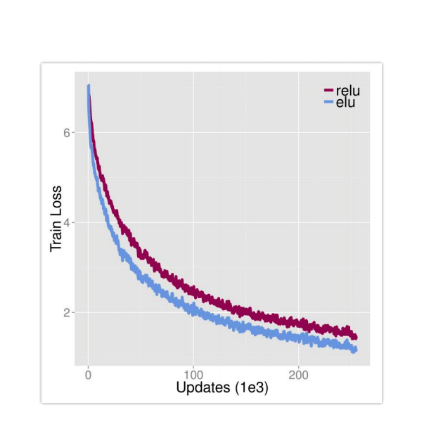

### Дополнительные материалы
В качестве дополнительной литературы рекомендуем вам прочесть статью «Fast and accurate deep network learning by exponential linear units (ELUs)». https://arxiv.org/pdf/1511.07289.pdf

# 4.2. Инициализация весов
https://vod-progressive.akamaized.net/exp=1645788507~acl=%2Fvimeo-prod-skyfire-std-us%2F01%2F4348%2F12%2F321740303%2F1250018920.mp4~hmac=7fa0f76854b14dc6646a2fcdb9de92eec3f7d15fde52596b2cf492eeaa7bde88/vimeo-prod-skyfire-std-us/01/4348/12/321740303/1250018920.mp4

Нейронные сети нельзя инициализировать нулевыми весами, так как в этом случае появляется эффект симметрии и, как следствие, сеть становится менее мощной.

Нейрон и дисперсия до активации  
Если у каждого входа нейросети среднее равно 0, и мы генерируем веса независимо от входов, то это нам гарантирует, что среднее нейрона до активации тоже будет равно 0. 

Но дисперсия может расти, и это замедлит сходимость.
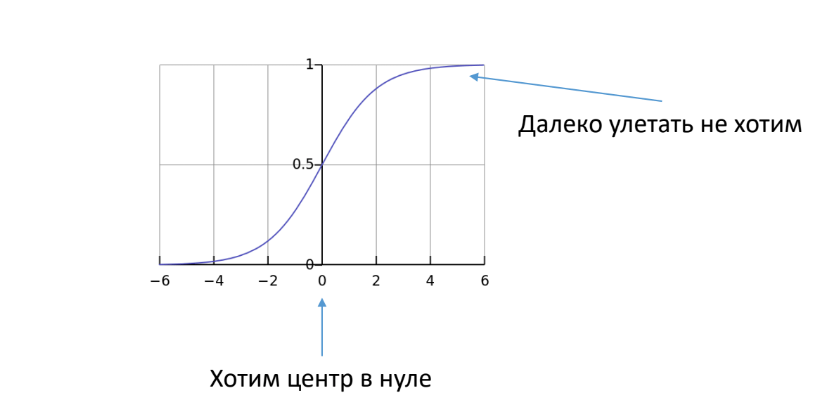
Дисперсия суммы некоррелированных величин — это сумма дисперсий, слагаемые некоррелированы, потому что веса, которые мы генерируем, независимы.

Сходимость  
Гиперболический тангенс для маленьких функций (около 0) похож на линейную функцию, то есть наши ранние выкладки примерно верны, и это означает, что, так как мы гарантируем одинаковую дисперсию на разных слоях нейросети, то выход будет распределён примерно одинаково после применения функции активации и, следовательно, градиенты будут в примерно одинаковом масштабе. Этот факт позволит ускорить сходимость.
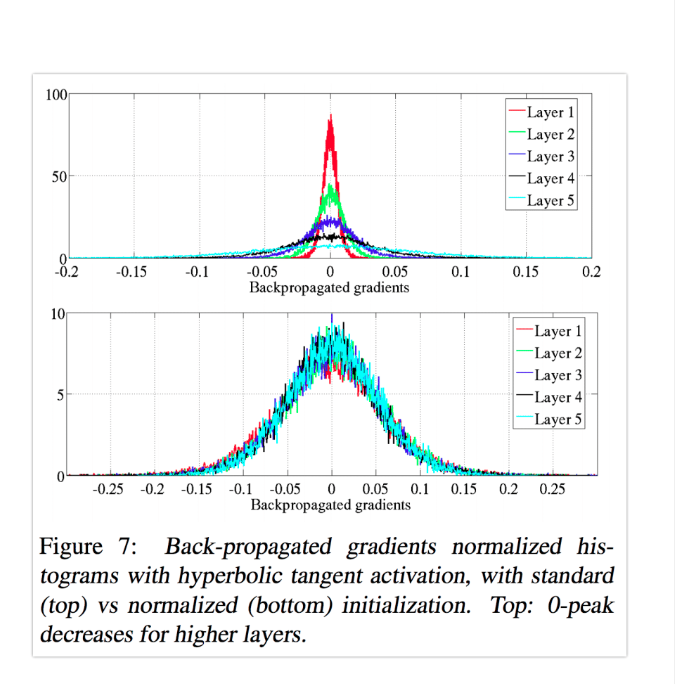
Дополнительные материалы  
В качестве дополнительной литературы рекомендуем вам:
- ознакомиться с содержанием «Computacion Inteligente Derivative-Based Optimization»;
- прочесть раздел «Sum of uncorrelated variables (Bienaymé formula)»;
- изучить статью «Understanding the difficulty of training deep feedforward neural networks».

# 4.3. Влияние learning rate и масштаба признаков на сходимость
https://vod-progressive.akamaized.net/exp=1645788564~acl=%2Fvimeo-prod-skyfire-std-us%2F01%2F4298%2F12%2F321491591%2F1248814479.mp4~hmac=a931d4d5b98a76de77d0dec864ccc4a7b1bdc70481eb3983f6815b0664f6cc99/vimeo-prod-skyfire-std-us/01/4298/12/321491591/1248814479.mp4

ИСПОЛЬЗУЕМЫЙ В ВИДЕО NOTEBOOK  
https://lms.skillfactory.ru/assets/courseware/v1/d0571757d0b1bc88377a888adbcd4e8b/asset-v1:Skillfactory+DST-WEEKLY-2.0+08JULY2020+type@asset+block/dl_mod_4_3.ipynb

Рассмотрим, как влияет масштаб признаков в линейной регрессии на сходимость градиентных методов.

Начнём с импорта библиотек. Здесь нам понадобится TensorFlow для визуализации процесса градиентного спуска и вспомогательные функции, которые будут отрисовывать анимацию.

Задача регрессии:

У нас есть два признака: x1, x2, на которых настроена линейная модель для предсказания y:
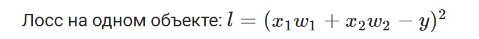
Среднеквадратичное отклонение будем рисовать в пространстве параметров при помощи линий уровня. Линия уровня — это множество точек, на которых функция принимает одно и то же значение.
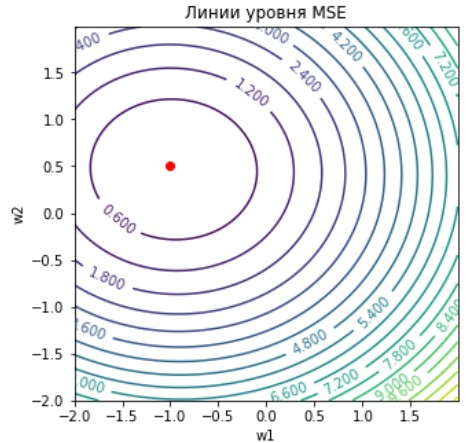
Глядя на линии уровня, мы можем представить, как устроена трёхмерная поверхность функции двух переменных w1 и w2.

Красная точка на рисунке — это оптимальный набор параметров.  
Рассмотрим, как выглядят матрицы W1 и W2. Для расчёта функции потерь вытянем их в вектор:

```Z = np.mean((x.dot(np.vstack([W1.ravel(), W2.ravel()])) - y)**2, axis=0).reshape(W1.shape)```
Рассмотрим, как изменятся линии уровня, если ось x умножить на коэффициент 2, например:

```x[:, 0] *= 2  # признак x1 в x_scale раз больше (создает долины в лоссе)```
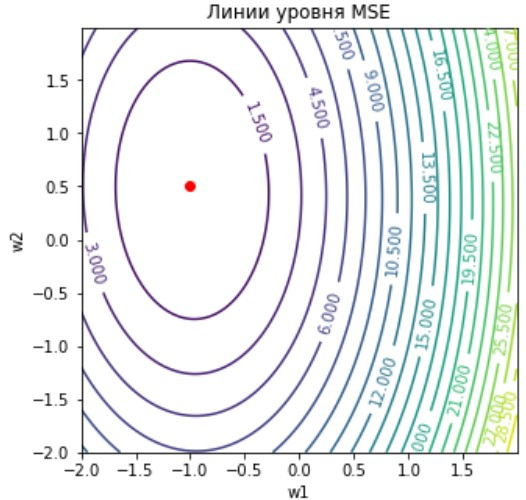
Эллипс сузился по горизонтальной оси. 

Если мы будем увеличивать масштаб x1, это будет сплющивать ось w1 на графике линий уровня.

Если x1 — большое число, то при небольшом изменении w1 лосс изменится сильно.  
Можно посчитать градиенты функций потерь по w1 и w2:
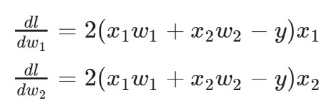
Когда x1 и x2 будут иметь сильно разный масштаб, градиенты по параметрам тоже будут иметь сильно разный масштаб. И это именно то, что будет ломать градиентный спуск.

Далее разберём функцию, которая будет рисовать градиентный спуск, и также поэкспериментируем с линиями уровня.

# 4.4. Batch-нормализация
https://vod-progressive.akamaized.net/exp=1645789070~acl=%2Fvimeo-prod-skyfire-std-us%2F01%2F4348%2F12%2F321744484%2F1250038529.mp4~hmac=f096977938f54e88f3eebd3f4feb91f9087cede018592918ad9e585b9fd839a2/vimeo-prod-skyfire-std-us/01/4348/12/321744484/1250038529.mp4

После инициализации и запуска backpropagation нет гарантий, что дисперсия не будет расти. Для нормирования выходов нейронов (до и после активации) можно использовать Batch-нормализацию.

Batch-нормализация пытается нормировать каждый выход нейрона таким образом, чтобы у него были нулевое среднее и фиксированная дисперсия.

Экспоненциальное сглаживание работает следующим образом: когда мы получаем среднее по батчу и Var по батчу, мы добавляем их в накопитель с некоторым весом, а старое значение в накопителе немного дискаунтируем.

Что делать с γ и β?  
γ и β нужны для масштабирования и сдвига активации: нейросети может быть полезно иметь, например,  не единичную дисперсию для какого-то нейрона, а большую, что поможет ей сойтись лучше.

Линейная комбинация каких-то других входов легко дифференцируется, поэтому эти коэффициенты можно добавить в  backpropagation, по ним будут считаться градиенты, и они будут автоматически подобраны.

# 4.5. Dropout-регуляризация
https://vod-progressive.akamaized.net/exp=1645789090~acl=%2Fvimeo-prod-skyfire-std-us%2F01%2F4349%2F12%2F321747434%2F1250053151.mp4~hmac=337de7a08a15d3eff0c522efe40feb5ba8c590bfc1ab976701737e00718d4741/vimeo-prod-skyfire-std-us/01/4349/12/321747434/1250053151.mp4

Dropout-регуляризация на каждом шаге backpropagation семплирует сеть и с вероятностью р оставляет каждый нейрон, но с вероятность 1 - р заменяет его на 0. Таким образом сеть подстраивается по частям.
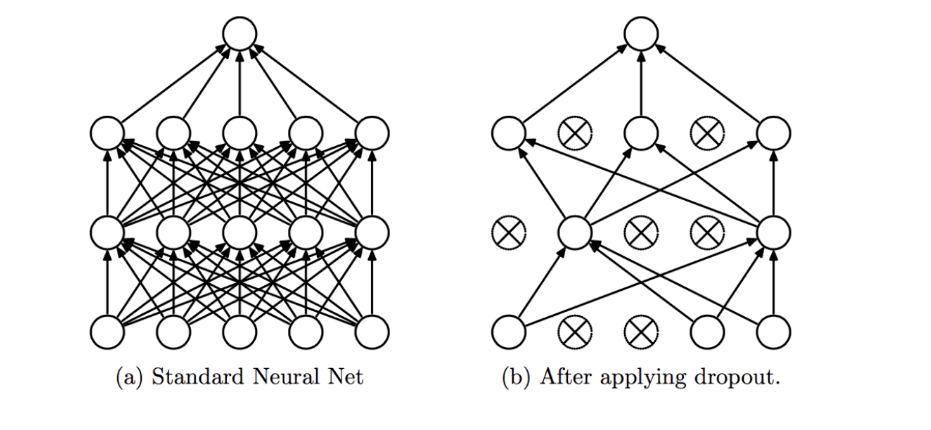
### Дополнительные материалы
В качестве дополнительной литературы рекомендуем вам прочесть статью «Dropout: A Simple Way to Prevent Neural Networks from Overfitting» http://www.cs.toronto.edu/~rsalakhu/papers/srivastava14a.pdf

# 4.6. Производная функции
https://vod-progressive.akamaized.net/exp=1645789158~acl=%2Fvimeo-prod-skyfire-std-us%2F01%2F4351%2F12%2F321755390%2F1250098689.mp4~hmac=7cec82712f223f24a3a604a9c67d89684e87a5404ac4183e65cc35a2b8e0d1c5/vimeo-prod-skyfire-std-us/01/4351/12/321755390/1250098689.mp4

В зависимости от того, какую величину шага в градиентном спуске learning rate вы выберете (большую или маленькую), вариации градиентного спуска будут выглядеть по-разному:
- Если learning rate слишком большой, это означает, что сначала оптимизация была, но остановилась и качество становится хуже, мы выходим из оптимальной точки.
- Если learning rate слишком маленький, то обучение слишком медленное.
- Если learning rate недостаточно большой, то поначалу обучение идёт отлично, а потом мы застреваем и не двигаемся дальше.
- Если learning rate оптимальный, то мы обучаемся быстро вначале, и к концу мы выходим на оптимальную точку.
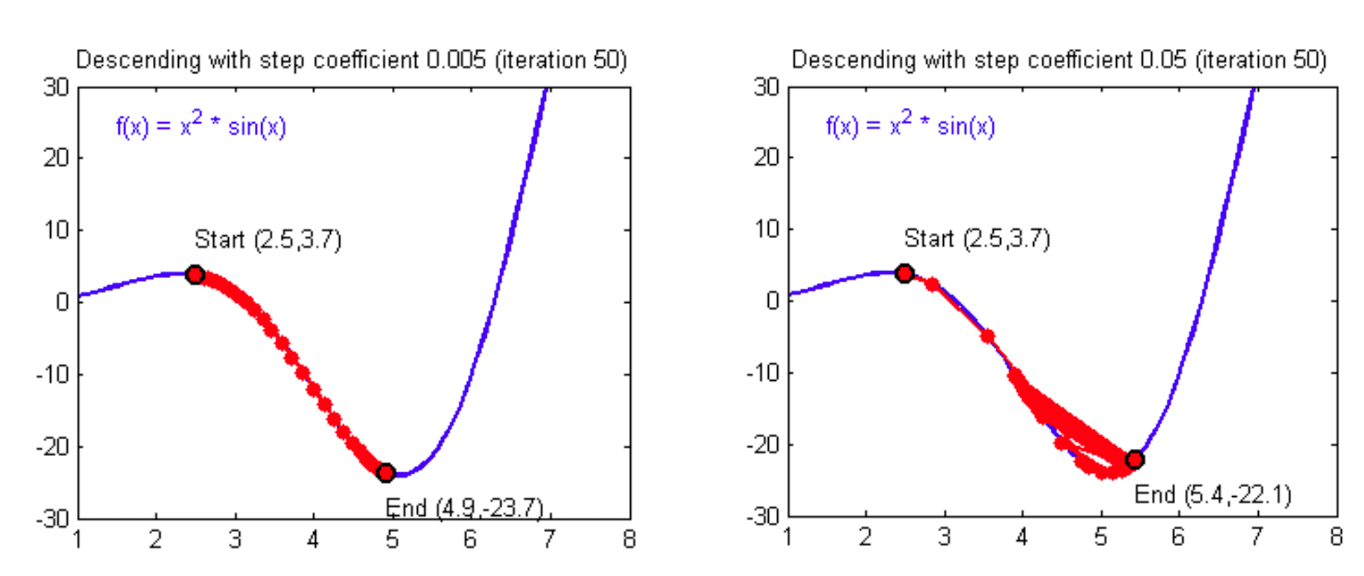
Почему стоит снижать learning rate с каждой итерацией? Если уменьшить learning rate, когда вы увидели, что обучение больше не происходит, то сеть ещё чуть-чуть доучится.

Проблема градиентного спуска — он застревает в локальных минимумах.
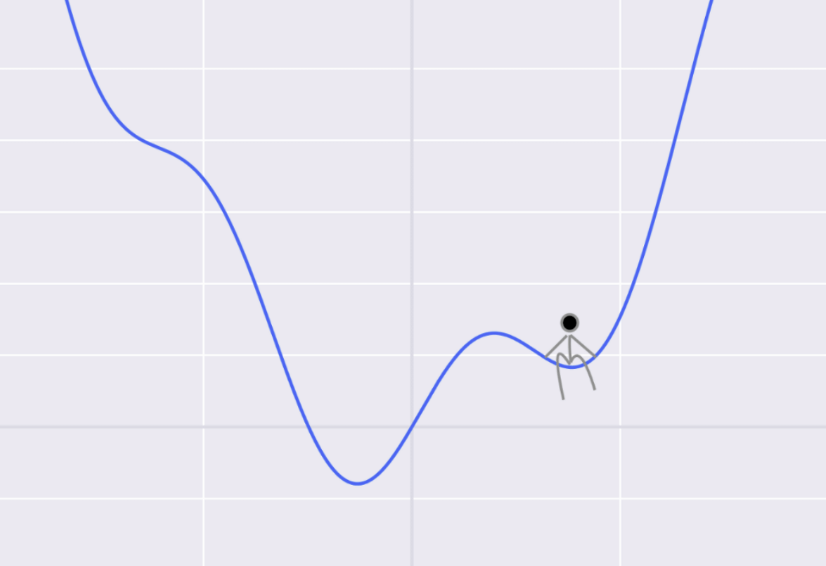
Дополнительные материалы  
В качестве дополнительной литературы рекомендуем вам прочесть статьи:
- «Beyond SGD: Gradient Descent with Momentum and Adaptive Learning Rate» https://wiseodd.github.io/techblog/2016/06/22/nn-optimization/
- «Life is gradient descent» https://hackernoon.com/life-is-gradient-descent-880c60ac1be8

# 4.7. Стохастический градиентный спуск (SGD)
https://vod-progressive.akamaized.net/exp=1645789233~acl=%2Fvimeo-prod-skyfire-std-us%2F01%2F4353%2F12%2F321765976%2F1250152485.mp4~hmac=4958f29fcf593e86f102d7bdd453e42ca8ab23f4827294171fcecb9827307f43/vimeo-prod-skyfire-std-us/01/4353/12/321765976/1250152485.mp4

Стохастический градиентный спуск (SGD)  является итерационным методом оптимизации с дифференцируемой целевой функцией, суть градиентного спуска — минимизировать функцию, делая небольшие шаги в сторону наискорейшего убывания функции.

Плюсы SGD:
- позволяет быстрее делать шаги и быстрее сходиться;
- траектория становится более шумной, что помогает выпрыгивать из локальных оптимумов.

RMSProp — адаптивный шаг. RMSProp — метод, в котором скорость обучения адаптируется для каждого из параметров.

Градиентные методы медленно сходятся, если градиенты по разным параметрам в разном масштабе. Как их привести в один масштаб? Если мы делали несколько маленьких шагов по какой-то переменной, то можно увеличивать шаг, чтобы не делать оптимизацию слишком медленной по некоторым переменным. То есть мы делим скорость обучения для веса на скользящее среднее значение после градиентов для этого веса.

Adam — Adaptive Moment Estimation. Adam — метод, в котором сочетаются инерция и адаптивность шага. Если перед вами стоит выбор вариации SGD, то выбирайте Adam.

### Дополнительные материалы
В качестве дополнительной литературы рекомендуем вам прочесть статьи:
- «Why Momentum Really Works» https://distill.pub/2017/momentum/
- «An overview of gradient descent optimization algorithms» http://ruder.io/optimizing-gradient-descent/

# 4.8. Adam – Adaptive Moment Estimation
https://vod-progressive.akamaized.net/exp=1645789380~acl=%2Fvimeo-prod-skyfire-std-us%2F01%2F4298%2F12%2F321491517%2F1248813779.mp4~hmac=e17fffbc26762d1f7e626fff6729768e4c127ff64ad93cbb90ee358ee8444c9f/vimeo-prod-skyfire-std-us/01/4298/12/321491517/1248813779.mp4

ИСПОЛЬЗУЕМЫЙ В ВИДЕО NOTEBOOK  
https://lms.skillfactory.ru/assets/courseware/v1/63072142684a125cc105741c1c19035a/asset-v1:Skillfactory+DST-WEEKLY-2.0+08JULY2020+type@asset+block/skillfactory_dl_4_screencast.ipynb

В предыдущей задаче оптимизации MSE мы остановились на том, что при увеличении learning rate возникает осциллирование траектории.

Теперь мы рассмотрим на практике Adam. Запустим его на задаче, в которой признаки (а значит, и градиент) приблизительно одинакового масштаба. 
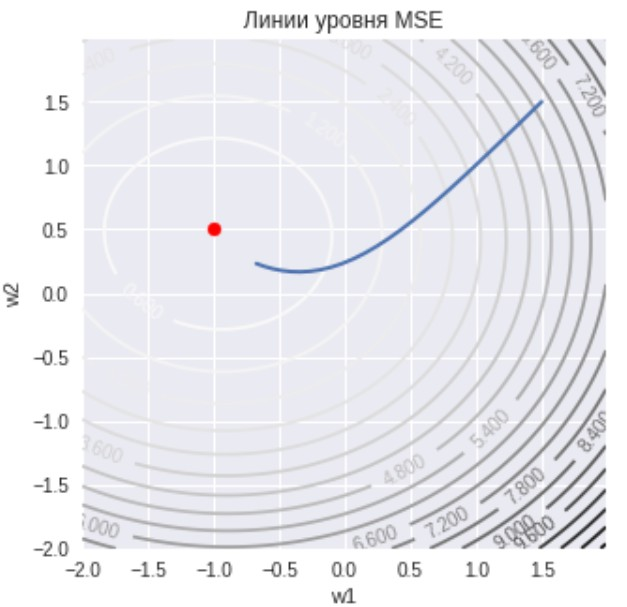
Сплющив вертикальную ось, заметим, что линии уровня станут сплюснутыми, а Adam сходится всё так же быстро.
```
# узкие долины функции
plot_gd(x_scale=0.5, lr=0.1, steps=25, optimizer='adam')
```
Всё дело в адаптивном шаге, что нормирует градиенты и позволяет оптимально двигаться во всех направлениях.

Задавая ещё более узкие долины, убедимся в этом.

Теперь увеличим learning rate в 20 раз.
```
# сломает ли его шаг побольше?
# слишком большие шаги, закручиваемся вокруг решения из-за момента
plot_gd(x_scale=0.2, lr=2.0, steps=25, optimizer='adam')
```
Видим, что Adam шагает слишком далеко, и его траектория выглядит курьёзно.
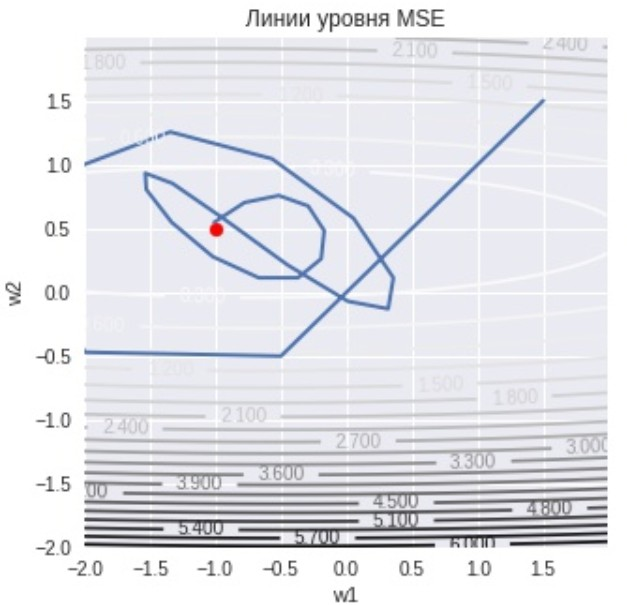
Но, тем не менее, в итоге мы сошлись к самому хорошему решению.

Learning rate — это гиперпараметр, который нужно подбирать, и всё, конечно, зависит от того, как выглядит форма Loss-функции.

### Дополнительные материалы
В качестве дополнительной литературы рекомендуем вам прочесть статью «Preconditioning the Network » https://cnl.salk.edu/~schraudo/teach/NNcourse/precond.html

# 4.9. Матричные операции
https://vod-progressive.akamaized.net/exp=1645789530~acl=%2Fvimeo-prod-skyfire-std-us%2F01%2F4358%2F12%2F321793298%2F1250289316.mp4~hmac=9a78be2fa653792347cfa71b3a7e8d2870fa80ce4ac7cb055a8b07efed5a3f6c/vimeo-prod-skyfire-std-us/01/4358/12/321793298/1250289316.mp4

Интерфейс прямого прохода  
Для прямого прохода интерфейс очень простой — это функция, которая принимает вход и генерирует выход, то есть один вход и один выход.

Обратный проход производится по графу из производных, то есть, когда мы идём по нему в обратную сторону, мы рассчитываем с помощью цепного правила производные по всем параметрам, которые есть в сети.

Чтобы реализовать Backward pass для новой вершины, нужно реализовать функцию, у которой есть входы —  то, что использовалось как вход сигмоиды во время прямого прохода. Так как необходимо считать производную в какой-то точке, сначала  backpropagation делает прямой проход, запоминает все значения аргументов, а потом использует их во время обратного прохода, чтобы рассчитать производные функций в нужных точках.
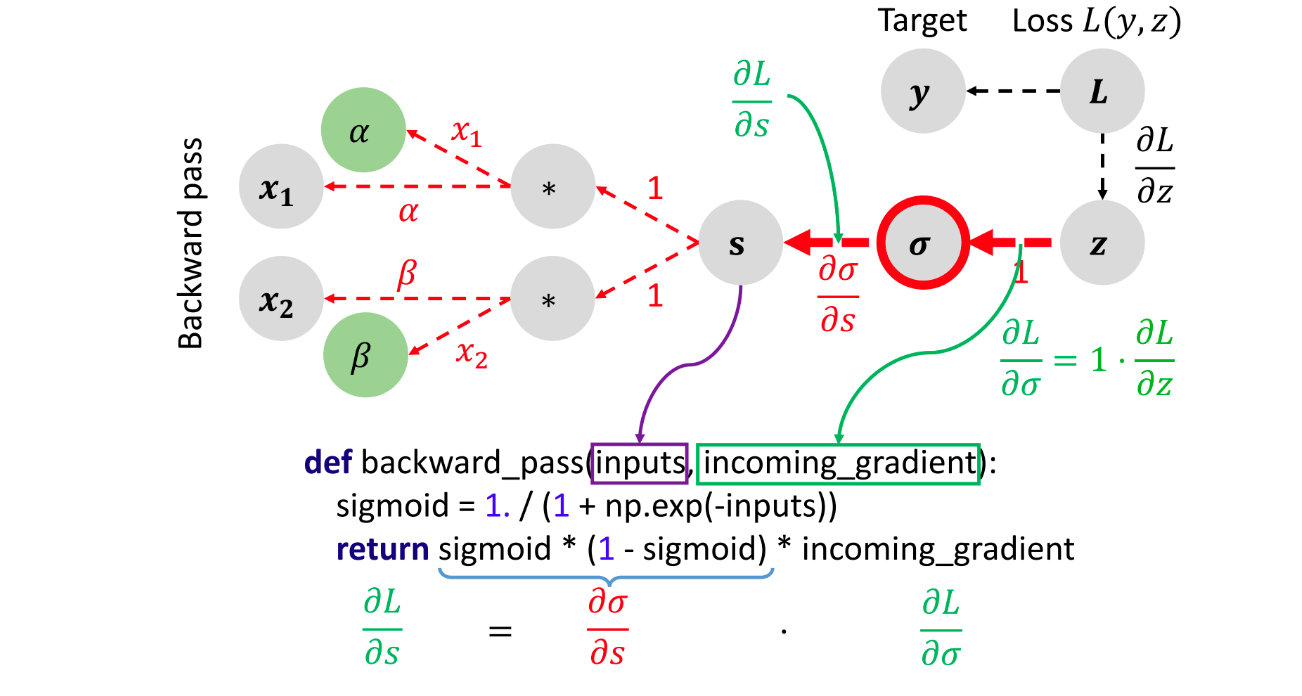
Полносвязный слой как произведение матриц  
Матричные операции используются часто, они реализованы быстро. Существуют такие пакеты, как CPU (BLAS) и GPU (cuBLAS), которые производят численные операции очень быстро, используя векторные операции процессора.

Обратный проход  
Для обратного шага необходимо посчитать производную наших потерь (обычно это скалярное значение) по каждому весу, который мы использовали.

Быстрая реализация в NumPy  
Производит матричные операции очень быстро, не на Python, и NumPy можно настроить таким образом, чтобы он использовал те же инструкции, что заложены в пакетах BLAS.

# 4.10. Домашнее задание
В домашнем задании мы продолжим работать над классификацией изображений в датасете CIFAR10, пробуя некоторые трюки по оптимизации нейронных сетей.

Для выполнения домашнего задания сохраните Jupyter notebook https://colab.research.google.com/drive/1rAnPF4UDSlFrSBE42W8Cin1n5QObLdcJ с инструкциями по решению задачи на свой Google Диск, с которого вы сможете работать на Google Colaboratory. 

Чтобы завершить домашнюю работу, ответьте на вопросы ниже. 

Удачи!

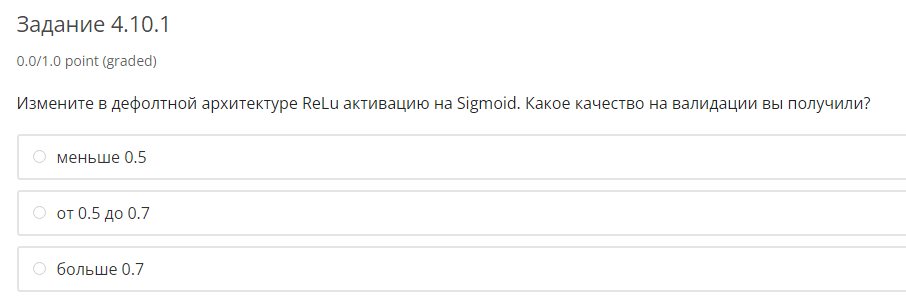

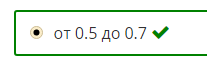

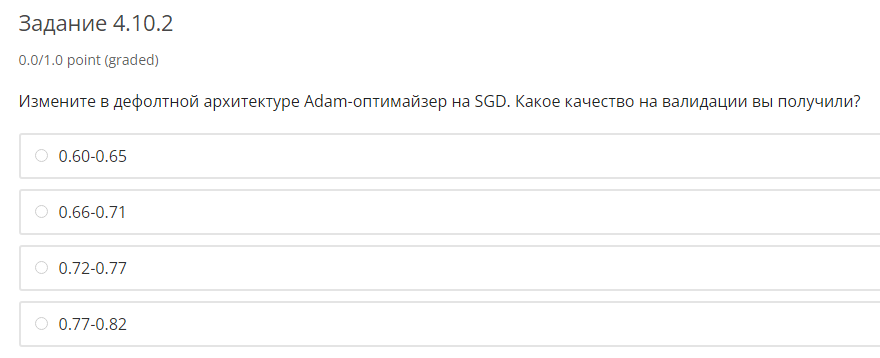

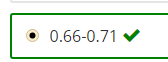

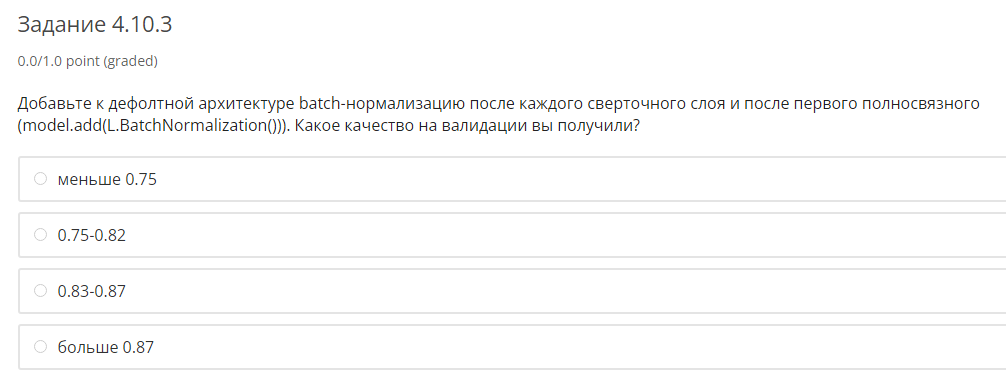

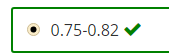

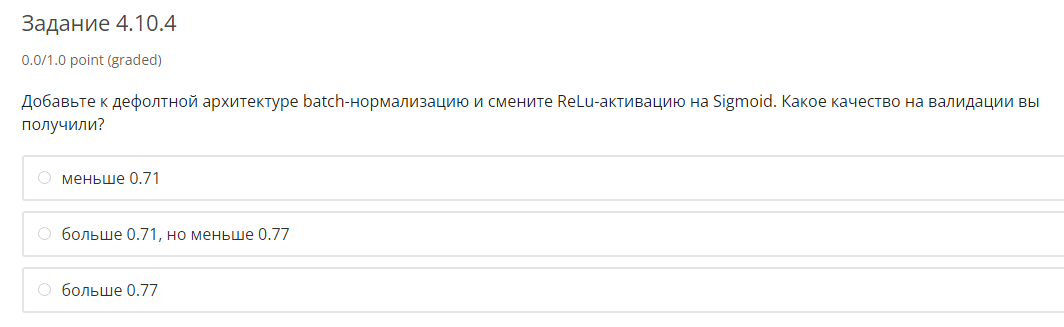

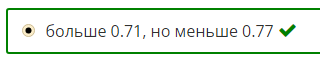